In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

from models.wimp import SIWIMP
from models.wimp import SIWIMP_Helm
from detectors.nai import DAMA
from veldists import VelDist
from constants import *

In [2]:
## Step 1
Det = DAMA()
Model = SIWIMP()
Dist = VelDist("modgSHM",0.3) # standard halo model
Dist2 = VelDist("modgShards",0.3) # standard halo model + shards

In [3]:
## Step 2
mX = 62*GeV # eV
sig = 1.1E-41 # cm2 note this is here sigma_p (see thesis notes for explanation)

def DMRate(T,E):
    ## DM rate defined with SHM
    return Model.dRdER(T,mX,E,sig,Dist)

def DMRate2(T,E):
    ## DM rate defined with SHM+Shards
    return Model.dRdER(T,mX,E,sig,Dist2) 

/Users/madeleinezurowski/Documents/sensitivity_dev/sgm/detector.py:101: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = integrate.quad(lambda E2: self.dRdE_True(Model,E2)*self.Res(E,E2),0,2*self.Emax(),points=self.ROI(),limit=int(1E8))[0] ## this integral could probs be optimised
/Users/madeleinezurowski/Documents/sensitivity_dev/sgm/detector.py:101: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = integrate.quad(lambda E2: self.dRdE_True(Model,E2)*self.Res(E,E2),0,2*self.Emax(),points=self.ROI(),limit=int(1E8))[0] ## this integral could probs be optimised


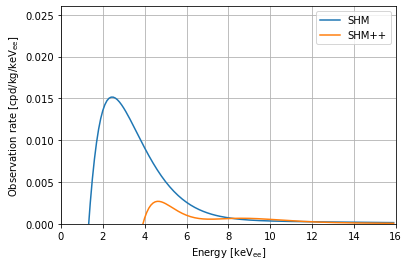

In [4]:
## Step 3
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[Det.dRdE(DMRate,e) for e in E])
plt.plot(E,[Det.dRdE(DMRate2,e) for e in E])
plt.legend(["SHM","SHM++"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.xlim(0,16)
plt.ylim(0,0.026)
plt.grid()
plt.show()